In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [4]:
data = pd.read_csv("C:/Users/ISHMO_CT/Desktop/projects/data_science_projects/LAP/LoanApprovalPrediction.csv")

In [5]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
obj = (data.dtypes == 'object')
print("Categorical variables:", len(list(obj[obj].index)))

Categorical variables: 7


In [7]:
# drop unique columns 
data.drop('Loan_ID', axis=1, inplace=True)

In [8]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
data = data.dropna(axis=1)

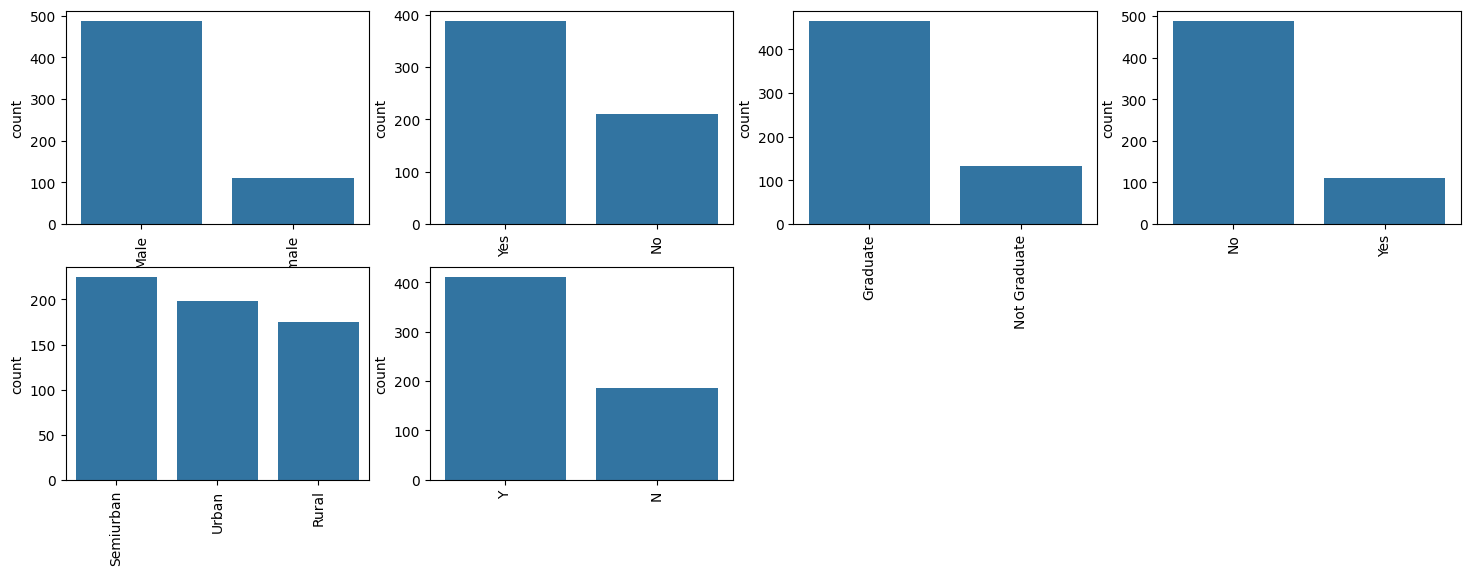

In [10]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1 


In [11]:
from sklearn.preprocessing import LabelEncoder

Label_encoder = LabelEncoder()
obj = (data.dtypes == "object")
for col in list(obj[obj].index):
    data[col] = Label_encoder.fit_transform(data[col])

In [12]:
data.head(5)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,2,1
1,1,1,0,0,4583,1508.0,0,0
2,1,1,0,1,3000,0.0,2,1
3,1,1,1,0,2583,2358.0,2,1
4,1,0,0,0,6000,0.0,2,1


<Axes: >

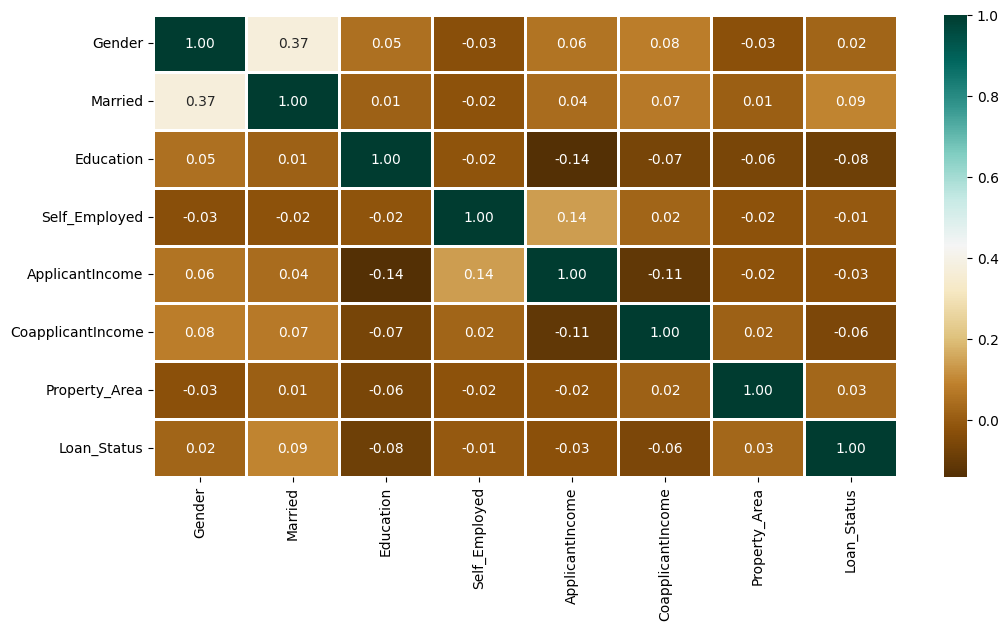

In [13]:
# plot heat map corroletion  
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)

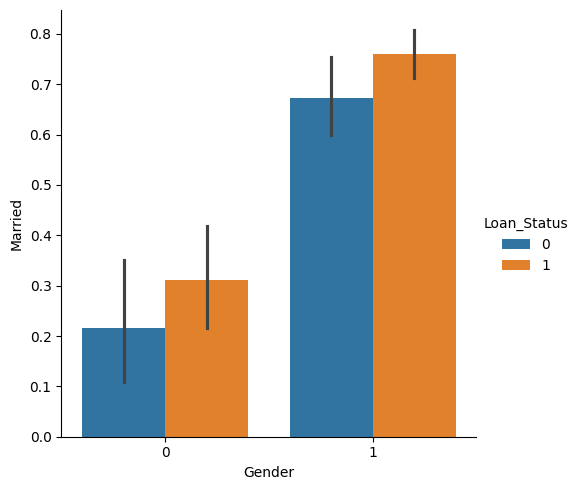

In [14]:
sns.catplot(x='Gender', y='Married', hue="Loan_Status", kind="bar", data=data)

In [15]:
from sklearn.model_selection import train_test_split

target = 'Loan_Status'
X = data.drop(target, axis=1)
y = data[target]
X.shape, y.shape

((598, 7), (598,))

In [16]:
# split the data to train test and validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((478, 7), (120, 7))

In [17]:
# Validation set 
X_train, X_Val, y_train, y_Val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train.shape, X_Val.shape

((382, 7), (96, 7))

In [18]:
print(data.isna().sum())

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Property_Area        0
Loan_Status          0
dtype: int64


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# models 
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
svc = SVC()
lc = LogisticRegression(max_iter=300)

# impute to rempve Nan 
imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.fit_transform(X_test)
X_Val_imputed = imputer.fit_transform(X_Val)

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.fit_transform(X_test_imputed)
X_Val_scaled = scaler.fit_transform(X_Val_imputed)



In [25]:
# prediction on test set 
for clf in (rfc, knn, svc, lc):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print("Accurancy score of", clf.__class__.__name__,"=",100*metrics.accuracy_score(y_test, y_pred)) 

Accurancy score of RandomForestClassifier = 62.5
Accurancy score of KNeighborsClassifier = 63.33333333333333
Accurancy score of SVC = 70.83333333333334
Accurancy score of LogisticRegression = 70.0


In [26]:
# prediction on test set 
for clf in (rfc, knn, svc, lc):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_Val_scaled)
    print("Accurancy score of", clf.__class__.__name__,"=",100*metrics.accuracy_score(y_Val, y_pred)) 

Accurancy score of RandomForestClassifier = 62.5
Accurancy score of KNeighborsClassifier = 64.58333333333334
Accurancy score of SVC = 64.58333333333334
Accurancy score of LogisticRegression = 64.58333333333334


In [27]:
# Lets take on svc model since it perfomed better 
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(X_train_scaled,y_train)

SVC()

In [36]:
# prediction
y_pred = svc_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
data['Loan_Status'].value_counts()

Loan_Status
1    411
0    187
Name: count, dtype: int64

In [41]:
# model before balanced 
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

In [42]:
y_pred = svc_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7083333333333334

In [44]:
svc_model = SVC(class_weight='balanced')
svc_model.fit(X_train_scaled, y_train)

SVC(class_weight='balanced')

In [47]:
# predict again 
y_pred = svc_model.predict(X_test_scaled)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1])

In [48]:
# Metrics lets find out the accurancy for the model 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5416666666666666